# 머신러닝 소개, scikit-learn 패키지 사용법

## 설치 된 모듈 확인

In [1]:
import scipy
import numpy as np
import sklearn
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

* 이번 주 코드에서 이해 안되는 부분은 넘어가기 바랍니다.
* matplotlib 으로 그래프 그리는 방법에 관한 자세한 설명은 다음 주 강의에서 하겠습니다.
* 이번 주는 사이킷 런 코드 부분만 사용법을 익히기 바랍니다.

In [2]:
# 필요한 패키지 불러오기
import matplotlib.pyplot as plt # 무시
from mpl_toolkits.mplot3d import Axes3D # 무시

import numpy as np
from scipy import stats

from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

## 논리곱(AND)
* 둘 모두 참이어야 참
* 머신러닝에서 A, B가 모델에 입력되는 속성이고, 결과가 모델로부터 나타나는 결과

|A|B|결과|
|:-:|:-:|:-:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

In [3]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0,0,0,1]

X = np.array(X)
y = np.array(y)

* zip은 길이가 동일한 두 리스트나 튜플의 원소를 짝지어 묶어줌 

In [4]:
for _x, _y in zip(X, y):
    print(_x, _y)

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


* AND 연산은 선형 분리 가능
  * 직선 한 개로 분리 가능하다는 의미
  * 즉, 아래 그림과 같이 $y > -x + 1.5$ 참이면 1, 아니면 0
  * A, B 를 각각 $(x, y)$ 에 대입해보자.
  * (참고) $y = -x + 1.5$ 와 같은 식을 decision boundary 라고 부름

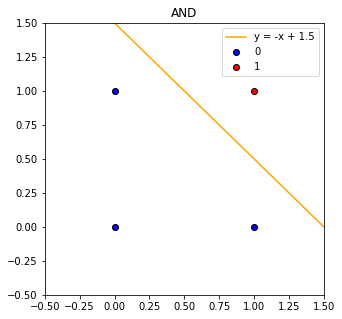

In [5]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
x = np.linspace(-2, 2, 100)
plt.scatter(X[:, 0][:3], X[:, 1][:3], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='red', edgecolor='k', label=1)
plt.plot(x, -x + 1.5, color='orange',label='y = -x + 1.5')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('AND')
plt.show()

In [6]:
# 선형 분리 데이터용 모델에 적용
svc_linear = LinearSVC().fit(X, y)
y_pred = svc_linear.predict(X)
print(y_pred)

[0 0 0 1]


In [7]:
# 이해 안되는 코드는 일단 넘어갈 것
XX, YY = np.meshgrid(np.linspace(-.5, 1.5, 100), np.linspace(-.5, 1.5, 100))
temp = np.zeros((len(XX.flatten()), 2))
temp[:, 0] = XX.flatten()
temp[:, 1] = YY.flatten()

ZZ = svc_linear.predict(temp)
ZZ = np.reshape(ZZ, XX.shape)

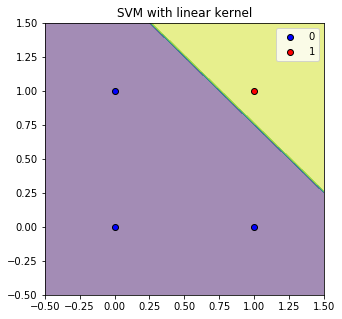

In [8]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
plt.contourf(XX, YY, ZZ, alpha=.5)
plt.scatter(X[:, 0][:3], X[:, 1][:3], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='red', edgecolor='k', label=1)
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('SVM with linear kernel')
plt.show()

## 논리합(OR)
* 둘 중 하나라도 참이면 참

|A|B|결과|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [9]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0,1,1,1]

X = np.array(X)
y = np.array(y)

* OR 연산 또한 선형 분리 가능
  * 즉, 아래 그림과 같이 $y > -x + 0.5$ 참이면 1, 아니면 0
  * A, B 를 각각 $(x, y)$ 에 대입해보자.

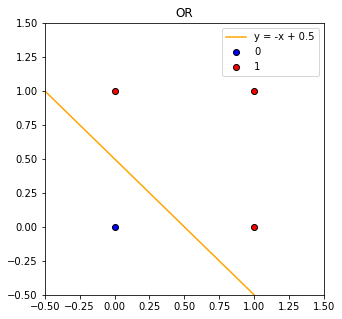

In [10]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
x = np.linspace(-2, 2, 100)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:], X[:, 1][1:], color='red', edgecolor='k', label=1)
plt.plot(x, -x + .5, color='orange',label='y = -x + 0.5')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('OR')
plt.show()

In [11]:
# 선형 분리 데이터용 모델에 적용
svc_linear = LinearSVC().fit(X, y)
y_pred = svc_linear.predict(X)
print(y_pred)

[0 1 1 1]


In [12]:
# 이해 안되는 코드는 일단 넘어갈 것
XX, YY = np.meshgrid(np.linspace(-.5, 1.5, 100), np.linspace(-.5, 1.5, 100))
temp = np.zeros((len(XX.flatten()), 2))
temp[:, 0] = XX.flatten()
temp[:, 1] = YY.flatten()

ZZ = svc_linear.predict(temp)
ZZ = np.reshape(ZZ, XX.shape)

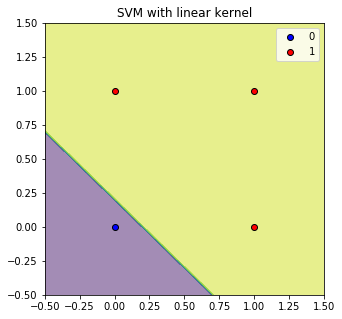

In [13]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
plt.contourf(XX, YY, ZZ, alpha=.5)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:], X[:, 1][1:], color='red', edgecolor='k', label=1)
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('SVM with linear kernel')
plt.show()

## 머신러닝은?
* 분류 문제에서 머신러닝이란 클래스를 나누어주는 decision boundary 를 찾아가는 과정

## 배타적논리합(XOR)
* 둘 중 하나만 참이어야 참

|A|B|결과|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [14]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0,1,1,0]

X = np.array(X)
y = np.array(y)

* XOR 연산은 선형 분리 불가능
  * 1차 함수 하나로 분리가 불가능

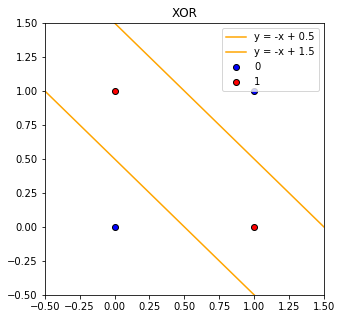

In [15]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
x = np.linspace(-2, 2, 100)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:3], X[:, 1][1:3], color='red', edgecolor='k', label=1)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='blue', edgecolor='k')
plt.plot(x, -x + .5, color='orange',label='y = -x + 0.5')
plt.plot(x, -x + 1.5, color='orange',label='y = -x + 1.5')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('XOR')
plt.show()

## 서포트 벡터 머신 (support vector machine, SVM)
* 모델이름.fit(X, y) : X 속성에 해당하는 y 클래스로 분류하는 모델 학습
* 모델이름.predict(new_X) : 새롭게 관측한 new_X 속성을 갖는 데이터가 어떤 클래스에 속하는지 분류
* 데이터가 선형분리 된다는 가정으로 모델을 만들면?

In [16]:
# 선형 분리 데이터용 모델에 적용
svc_linear = LinearSVC().fit(X, y)
y_pred = svc_linear.predict(X)
print(y_pred)

[0 1 0 1]


In [17]:
# 이해 안되는 코드는 일단 넘어갈 것
XX, YY = np.meshgrid(np.linspace(-.5, 1.5, 100), np.linspace(-.5, 1.5, 100))
temp = np.zeros((len(XX.flatten()), 2))
temp[:, 0] = XX.flatten()
temp[:, 1] = YY.flatten()

ZZ = svc_linear.predict(temp)
ZZ = np.reshape(ZZ, XX.shape)

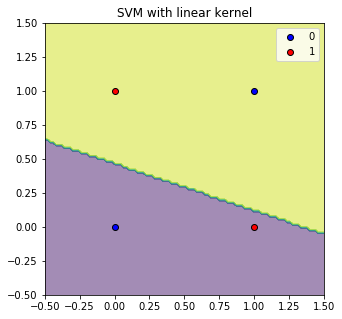

In [18]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
plt.contourf(XX, YY, ZZ, alpha=.5)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:3], X[:, 1][1:3], color='red', edgecolor='k', label=1)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='blue', edgecolor='k')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('SVM with linear kernel')
plt.show()

* (1, 1) 데이터에 오류 발생

* XOR 로 주어진 점을 커널을 이용해서 맵핑해봅시다.
* 즉, $(x, y)$ 점을 $(x, y, x*y)$ 점에 맵핑
* 세 번째 차원을 AND 연산 한 결과와 동일

In [19]:
print('원래 점')
for x in X:
    print(x)

원래 점
[0 0]
[0 1]
[1 0]
[1 1]


In [20]:
def kernel(X):
    _X = np.zeros((len(X), 3))
    for i in range(len(X)):
        x = X[i][0]
        y = X[i][1]
        _X[i] = [x, y, x*y]
    return _X

_X = kernel(X)

print('커널 매핑 후 점')
for x in _X:
    print(x)

커널 매핑 후 점
[0. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 1. 1.]


즉,

|A|B|
|:-:|:-:|
|0|0|
|0|1|
|1|0|
|1|1|

를

|A|B|C|
|:-:|:-:|:-:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

으로 매핑

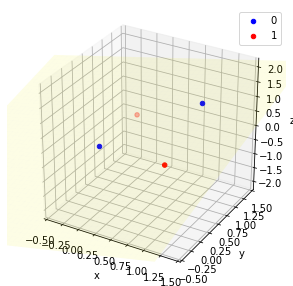

In [21]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
zz = xx/2 + yy/2
ax.plot_surface(xx,yy,zz, alpha=.1, color='yellow')

ax.scatter(_X[:,0][0], _X[:,1][0], _X[:,2][0], label='0',color='blue')
ax.scatter(_X[:,0][1:3], _X[:,1][1:3], _X[:,2][1:3], label='1', color='red')
ax.scatter(_X[:,0][3], _X[:,1][3], _X[:,2][3], color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.show()

* 위 그림이 잘 안보이는데 아래 그림 처럼 생각하면 됨
* 즉 커널을 이용하여 데이터 포인트를 매핑하여, 아래 그림 회색 초평면으로 분리 가능
![](https://www.researchgate.net/profile/John_Bishop5/publication/271841595/figure/fig19/AS:668441707024390@1536380330379/Mapping-the-two-input-XOR-function-into-a-3D-space.png)

(출처: https://bit.ly/3dBGEv8)

* 선형 분리 안되는 데이터를 새로운 차원에 매핑하여 선형 분리 시킴

In [22]:
# rbf 커널이 데이터를 선형 분리 형태로 바꾸어주는 역할을 함
svc_rbf = SVC().fit(X, y)
y_pred = svc_rbf.predict(X)
print('실제 데이터\t', y)
print('모델이 학습한 결과\t',y_pred)

실제 데이터	 [0 1 1 0]
모델이 학습한 결과	 [0 1 1 0]


In [23]:
# 이해 안되는 코드는 일단 넘어갈 것
XX, YY = np.meshgrid(np.linspace(-.5, 1.5, 100), np.linspace(-.5, 1.5, 100))
temp = np.zeros((len(XX.flatten()), 2))
temp[:, 0] = XX.flatten()
temp[:, 1] = YY.flatten()

ZZ = svc_rbf.predict(temp)
ZZ = np.reshape(ZZ, XX.shape)

* 0 과 1 클래스에 따라 decision boundary 가 확실히 나누어짐

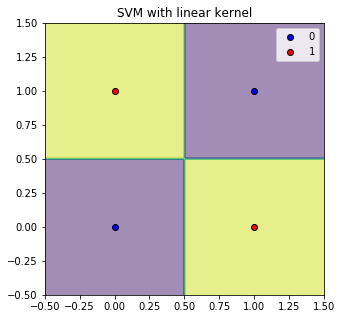

In [24]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
plt.contourf(XX, YY, ZZ, alpha=.5)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:3], X[:, 1][1:3], color='red', edgecolor='k', label=1)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='blue', edgecolor='k')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('SVM with linear kernel')
plt.show()

## 사이킷 런 제공 데이터셋 [(링크)](https://scikit-learn.org/stable/datasets/index.html)
* **이 아래 코드 부터 잘 익히기 바랍니다.** 
* 연습을 위한 토이 데이터셋을 제공함
* 외부 웹사이트에서 따로 다운로드 할 필요 없음
 * 보스턴 집값 데이터
 * 붓꽃 데이터
 * 당뇨 데이터
 * 손글씨 숫자 데이터
 * Linnerud 데이터
 * 와인 분류 데이터
 * 유방암 데이터셋
* 현실 세계 데이터셋도 제공
* 자동으로 해당 데이터가 다운로드 됨
 * AT&T 직원 얼굴 데이터셋
 * 20 뉴스그룹 데이터셋
 * 얼굴 데이터셋
 * 숲 데이터셋
 * 로이터 뉴스 데이터셋
 * 네트워크 데이터셋
 * 캘리포니아 집 데이터셋
* 그외 무작위 데이터 생성 방법도 제공

**수업에서는 붓꽃 데이터로 실습**

In [25]:
# 사이킷 런 제공 데이터 불러오기
iris = datasets.load_iris()

* dir() 내장함수
  * 객체가 가지고 있는 속성 리스트를 보여줌

In [26]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [27]:
# 데이터 설명
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
# 데이터 저장 된 위치
print(iris['filename'])

/Users/woonghee/miniconda3/envs/aifs/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv


In [29]:
# 속성 이름
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
# 타겟 이름
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [31]:
# 총 150개의 붓꽃의 네 가지 속성을 측정함
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
# numpy array 로 저장되어 있음
print(type(iris['data']))

# 따라서 shape 로 어떤 모양인지 알 수 있음
print(iris['data'].shape)

<class 'numpy.ndarray'>
(150, 4)


In [33]:
# 품종을 숫자로 적어둔 것
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# 품종도 numpy array 로 저장
iris['target'].shape

(150,)

* 변수 이름을 다루기 쉽게 바꿈

In [35]:
X = iris['data']
y = iris['target']

In [36]:
# 둘다 넘파이 배열
X.shape, y.shape

((150, 4), (150,))

## 머신러닝 모델 학습 순서
* 데이터 전처리 & 특징 추출
  * 분야 전문가(꽃 전문가)가 이미 붓꽃의 품종은 꽃받침, 꽃잎의 폭과 길이에 따라 다르다는 점을 이용해서, 네 가지 속성만 기록해둠 (**특징 추출**)
  * 속성의 크기를 정규화
  * 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 마다 범위가 제각각임
  * 범위를 일정 범위로 정규화 해주어야 모델 학습에 유리
    * 표준 정규화 또는 최소최대값 정규화를 해줌
* 학습 데이터, 테스트 데이터 분리
  * 머신러닝의 목적은 **관측한 데이터**로부터 모델을 학습하여
  * 학습한 모델로부터 **새로운 데이터**가 어떤 종류인지(분류)? 어떤 값이 될지(회귀)? 또는 어떤 집단에 속하는지(군집화)? 알아내는 것
  * 토이 데이터를 임의로 관측 데이터(학습 데이터, training dataset)와 새로운 데이터(테스트 데이터, test dataset)로 분리
* 모델 학습과 예측으로 성능 확인

### 데이터 전처리
* 표준스케일러
* 평균이 0, 표준편차가 1이 되도록 정규화
* 즉 각각의 속성에 대해서,
  * 평균이 $\mu$
  * 표준편차가 $\sigma$라면
  * $z = {(x-\mu) \over \sigma}$ 로 정규화
  * 이 때, $x$는 원래 값, $z$는 정규화 된 값
* (품종 구분에 영향을 주는 속성 네 가지 특징만 측정해두었음)

In [37]:
# 크기를 정규화할 클래스를 생성
scaler = StandardScaler()

# 스케일러가 데이터 크기를 정규화하도록 평균, 분산을 구함
scaler.fit(X)

# 스케일러가 구한 평균, 분산을 바탕으로 정규화할 데이터를 넣어줌
X_normalized = scaler.transform(X)

# 통계적 설명
X_stats = stats.describe(X_normalized)
print("평균",X_stats.mean)
print("분산",X_stats.variance)

평균 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
분산 [1.00671141 1.00671141 1.00671141 1.00671141]


(평균이 거의 0, 분산이 거의 1임을 볼 수 있음)

## 학습 / 테스트 데이터 분리
* train_test_split(*arrays, test_size, shuffle)
* \*arrays: 인자로 넣은 데이터 개수 만큼 분리해서 튜플로 반환
* test_size: 테스트 데이터의 비율
* random_state: 결과 재현을 위해 사용
* shuffle: 섞어줄지(True) 말지(False)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=.25, random_state=0, shuffle=True)

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


In [40]:
# 기본 kernel 은 'rbf' 로 모델 학습
# support vector machine classifier
svc = SVC().fit(X_train, y_train)

In [41]:
y_pred = svc.predict(X_test)

In [42]:
y_test.shape, y_pred.shape

((38,), (38,))

In [43]:
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [44]:
acc = accuracy_score(y_test, y_pred)

In [45]:
acc

0.9736842105263158

In [46]:
print(f"정확도 = {acc*100:.2f}%")

정확도 = 97.37%


## 연습문제

아래 문제 시나리오에 따라 어떤 머신러닝 분류에 속하는지, 어떤 풀이 알고리즘을 쓸 수 있을지

1.
 * 경기도 안산시 상록구에서 아파트의 속성을 측정하였다.
   * 한양대학교와 거리
   * 지하철과의 거리
   * 초등학교와 거리
   * 최고층
   * 넓이
   * 매매가
 * 앞서 다섯 가지 속성들로부터 매매가를 예측하고자 한다.
 * 이 문제는 지도학습? 비지도학습?
 * 그 중에 어떤 문제?
 * 어떤 모델을 적용가능?

(답)
* 지도학습 / 회귀 / 선형회귀분석, 로지스틱리그레션
* 지도학습 / (싸다 / 비싸다) -> 분류 / 의사결정나무, 서포트벡터머신

2.
  * 한양대학교 ERICA 캠퍼스 빅데이터마이닝 연구실에 들어왔다 나가는 사람의 얼굴을 아침, 점심, 저녁으로 총 한 달 간 촬영했다.
  * 어떤 사진이 누구인지는 모르지만, 동일한 사람이 찍힌 사진을 서로 묶어서 사진첩에 보관하려고 한다.
  * 이 문제는 지도학습? 비지도학습?
  * 그 중에 어떤 문제?
  * 어떤 모델을 적용가능?

(답)
* 비지도학습 / 군집화 / k평균, EM 알고리즘